In [29]:
#hide

In [111]:
#hide
import utils
utils.hero("Big-O Notation Introdution")

For any algorithm, we should think in terms of how long does it take for the algorithm to run for different input size. This is often referrred to as **time complexity** of an algorithm, mathematically represented by the **big-O notation**.

The **time complexity** is related to the number of operations performed.

In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [104]:
def get_mean(arr: np.ndarray) -> float: # Linear algorithm
    n_ops = 0 # number of operations performed
    total_sum = 0 # sum of all the elements in the array

    for i in range(len(arr)):
        total_sum += arr[i]
        n_ops += 1
    return n_ops

def get_weighted_mean(arr: np.ndarray, weights: np.ndarray) -> float: # Linear algorithm
    n_ops = 0 # number of operations performed
    num = 0
    deno = 0
    for i in range(len(arr)):
        num += weights[i] * arr[i]
        n_ops += 1
        deno += weights[i]
        n_ops += 1
    return n_ops

def get_sum_pairs(arr: np.ndarray) -> float: # Quadratic algorithm
    n_ops = 0 # number of operations performed
    accum = 0
    for i in range(len(arr)):
        for j in range(i+1, len(arr)):
            accum += (arr[i] + arr[j])
            n_ops += 1
    return n_ops

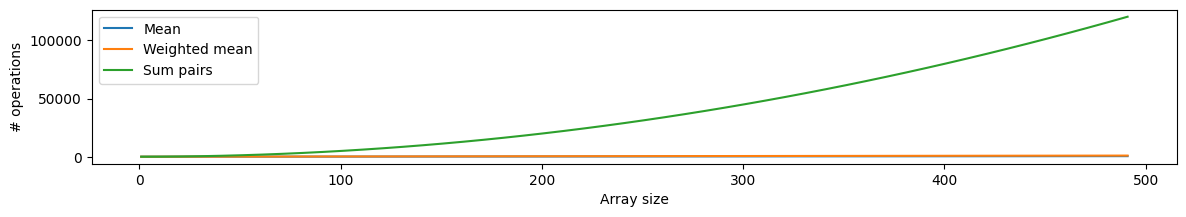

In [106]:
Ns = np.arange(1, 500, 10)
n_ops_mean = [get_mean(np.random.randn(N)) for N in Ns]
n_ops_weighted_mean = [get_weighted_mean(np.random.randn(N), np.random.randn(N)) for N in Ns]
n_ops_sum_pairs = [get_sum_pairs(np.random.randn(N)) for N in Ns]
plt.figure(figsize=(14, 2))
plt.plot(Ns, n_ops_mean, label="Mean")
plt.plot(Ns, n_ops_weighted_mean, label="Weighted mean")
plt.plot(Ns, n_ops_sum_pairs, label="Sum pairs")
plt.xlabel("Array size")
plt.ylabel("# operations")
plt.legend()
plt.show()

Although, we see the above in term of the number of operations but we can also check how long did it take by using `time` module.

In [38]:
import time

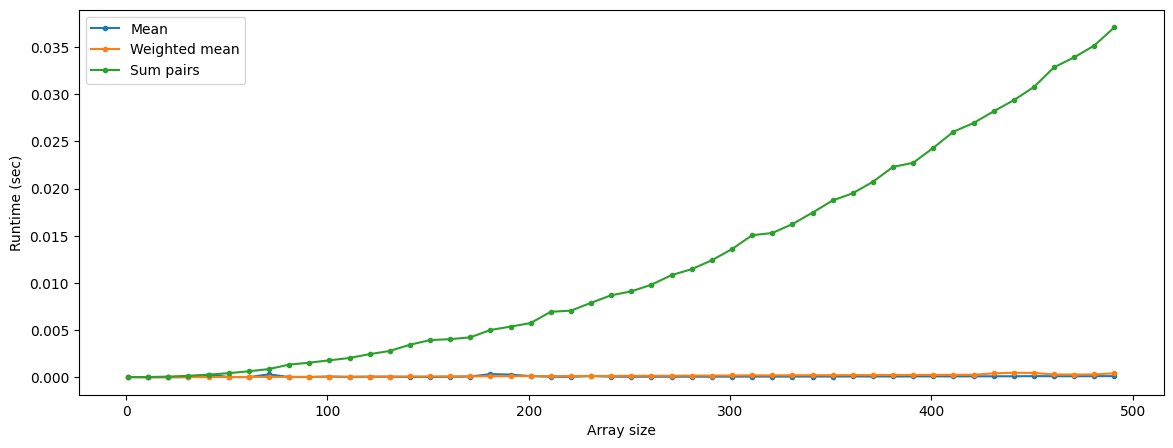

In [107]:
get_mean_elapsed_time = []
for N in Ns:
    tic = time.time()
    _ = get_mean(np.random.randn(N))
    toc = time.time()
    get_mean_elapsed_time.append(toc - tic)


get_weighted_mean_elapsed_time = []
for N in Ns:
    tic = time.time()
    _ = get_weighted_mean(np.random.randn(N), np.random.randn(N))
    toc = time.time()
    get_weighted_mean_elapsed_time.append(toc - tic)

get_sum_pairs_elapsed_time = []
for N in Ns:
    tic = time.time()
    _ = get_sum_pairs(np.random.randn(N))
    toc = time.time()
    get_sum_pairs_elapsed_time.append(toc - tic)


plt.figure(figsize=(14, 5))
plt.plot(Ns, get_mean_elapsed_time, label="Mean", marker="o", markersize=3)
plt.plot(Ns, get_weighted_mean_elapsed_time, label="Weighted mean", marker="o", markersize=3)
plt.plot(Ns, get_sum_pairs_elapsed_time, label="Sum pairs", marker="o", markersize=3)
plt.xlabel("Array size")
plt.ylabel("Runtime (sec)")
plt.legend()
plt.show()

In order to find out the **time complexity** of an algorithm, we look for the following:
1. Say, the time scaling by an algorithm is given by $ops(N)$, where $N$ is the input size.
2. We find out a dominant scaling term say $D(N)$ such that $lim_{N \to \infty} \frac{ops(N)}{D(N)} = c$ where $c$ is a constant. \
For example, $ops(N) = a + cN$, \
Now, if we assume that the dominant scaling term is $D(N) = N$ then $lim_{N \to \infty} \frac{a + cN}{N} = \frac{a}{N}+\frac{cN}{N} \approx c$ \
Hence the time complexity of the algorithm is $O(N)$

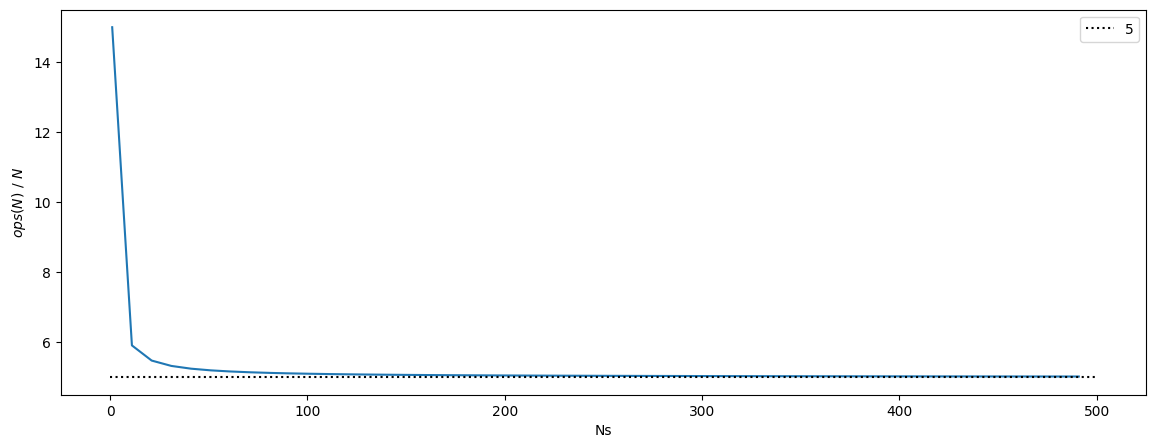

In [108]:
a = 10
c = 5

plt.figure(figsize=(14, 5))
plt.plot(Ns, (a + c*Ns) / (Ns))
plt.hlines(5, 0, 500, ls=":", color="k", label="5")
plt.xlabel("Ns")
plt.ylabel("$ops(N)$ / $N$")
plt.legend()
plt.show()

Let's take *sum_pairs* example: \
$ops(N) = \frac{N(N-1)}{2}$ \
Consider the dominant term to be $D(N)=N^2$, \
$lim_{N \to \infty} \frac{\frac{N(N-1)}{2}}{N^2} = \frac{N^2}{2N^2}-\frac{1}{2N^2} \approx \frac{1}{2}$

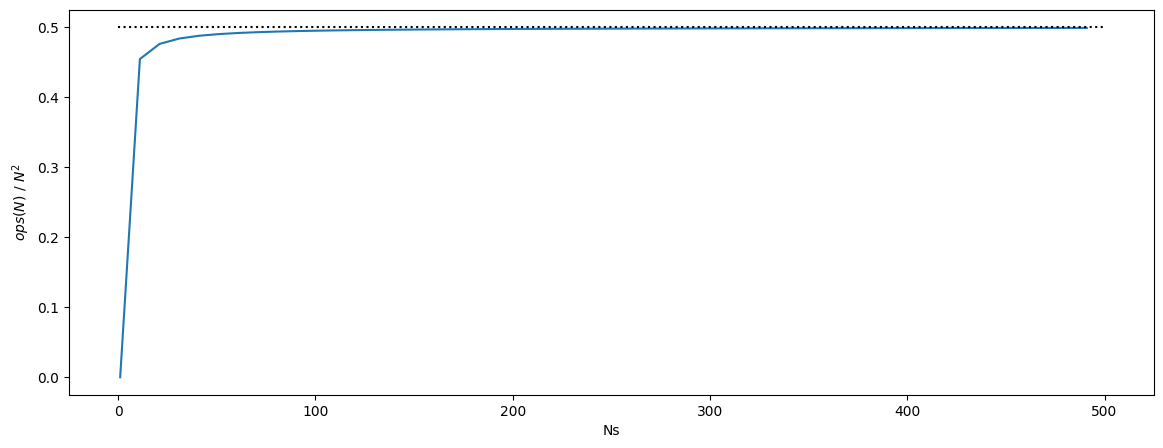

In [109]:
plt.figure(figsize=(14, 5))
plt.plot(Ns, (Ns * (Ns - 1) / 2) / (Ns ** 2))
plt.hlines(0.5, 0, 500, ls=":", color="k", label="5")
plt.xlabel("Ns")
plt.ylabel("$ops(N)$ / $N^2$")
plt.show()

Similary, there are algorithms with **logarithmic** time complexity. Binary search is one such algorithm.
Say, $ops(N) = c\log_2(N)$ \ 
For such alogrithms, if we double the input size, that only adds up 1 extra operations. \
$\frac{ops(2N)}{ops(N)} = \frac{c\log_2(2N)}{c\log_2(N)} = \frac{log_2(2) + log_2(N)}{log_2(N)} \approx 1$

/var/folders/gt/fhsl0g612dl9vr02m_hzypq00000gn/T/ipykernel_43750/2528119109.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(Ns, (np.log2(2*Ns)) / np.log2(Ns))


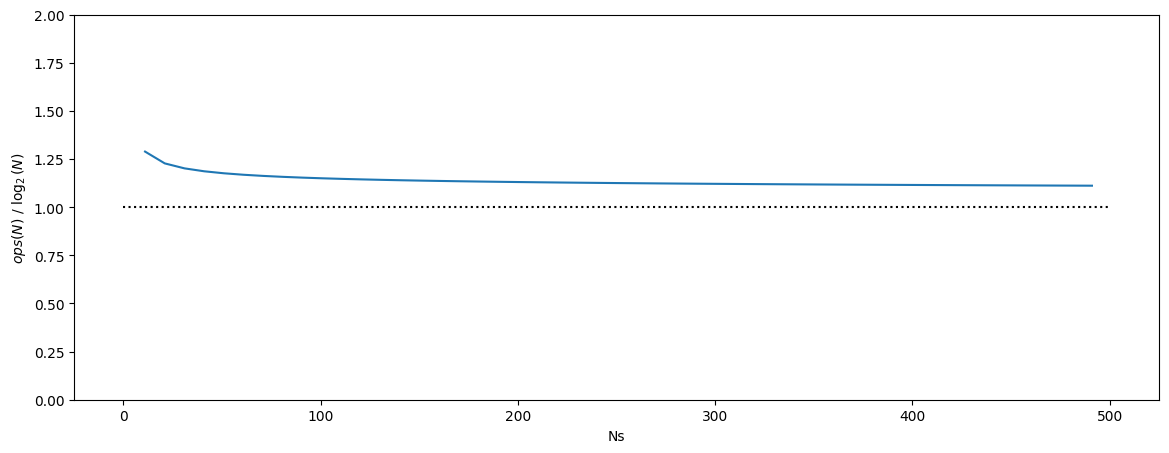

In [110]:
plt.figure(figsize=(14, 5))
plt.plot(Ns, (np.log2(2*Ns)) / np.log2(Ns))
plt.hlines(1, 0, 500, ls=":", color="k", label="5")
plt.xlabel("Ns")
plt.ylabel("$ops(N)$ / $\\log_2(N)$")
plt.ylim(0, 2)
plt.show()

So, in summary, Big-O is an upper bound to the scaling behaviour of an algorithm. \
Hence, weighted average algorithm is $O(N)$. But it is also true that weighted average is $O(N^2)$ as that is also an upper bound but not a *strict/tight bound*. \
Sometime, we are unable to prove the time complexity of an algorithm with a tight bound so we might propose a bound that is not strict but true.